# Predecting Player's Rank
## Overview
The main goal is to assign players to one of eight leagues based on their performance, represented by the league index (ranging from 1 to 8). To achieve this, we will develop classifiers that utilize data extracted from replays.

Approach:
In the initial phase, we will modify the dataset to make it suitable for analysis. This involves rebalancing the target feature's categories, removing irrelevant features, and scaling the descriptive features. These adjustments aim to enhance the accuracy of our predictive models.

First, Import the Necessary Libraries 



In [3]:
%matplotlib inline
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew

In [4]:
#Load the dataset
data = pd.read_csv('/content/starcraft_player_data.csv')

EDA: Exploratory Data Analysis
 - Do some Preprocessing

In [5]:
data.shape

(3395, 20)

There are total of 3395 players that data has been collected for, 20 variables that describes the data.

In [6]:
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [7]:
# Getting the Columns
data.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

Some checking to see if there exists any null data.

In [8]:
data.apply(lambda x: sum(x.isnull()), axis=0)

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

Basic Overview of dataset - summary

In [9]:
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


# Analysis

Performing visualizations and descriptive analysis on the dataset allows us to identify any potentially irrelevant features that can be eliminated before proceeding with the modeling phase. Additionally, it enables us to examine whether there is a correlation between a player's league and their statistics.

By visualizing the data, we can gain insights into the relationships and patterns within the dataset. This exploration helps us determine which features are meaningful for our analysis and which ones can be discarded. Removing irrelevant features upfront streamlines the modeling process and improves its efficiency.

Furthermore, analyzing the relationship between a player's league and their statistics allows us to understand if certain performance metrics are associated with specific leagues. This correlation can provide valuable information for our modeling task, potentially helping us develop more accurate classifiers.

Drop Columns and check for the null values

In [10]:
data_ID = data['GameID']
data.drop("GameID", axis = 1, inplace = True)
print("The data size after dropping Id feature is : {} ".format(data.shape)) 

The data size after dropping Id feature is : (3395, 19) 


### Feature Plotting

Feature Plotting and Scatter Plot:

To gain insights into the dataset, we can use feature plotting with boxplots to visualize the distribution of features within each league and compare them across leagues. This helps us understand feature variations and their discriminative power.

Additionally, scatter plots allow us to visualize relationships between variables. By plotting league index against player statistics, we can identify patterns or correlations between the two. These visualizations provide valuable information for analysis and decision-making during the modeling process.

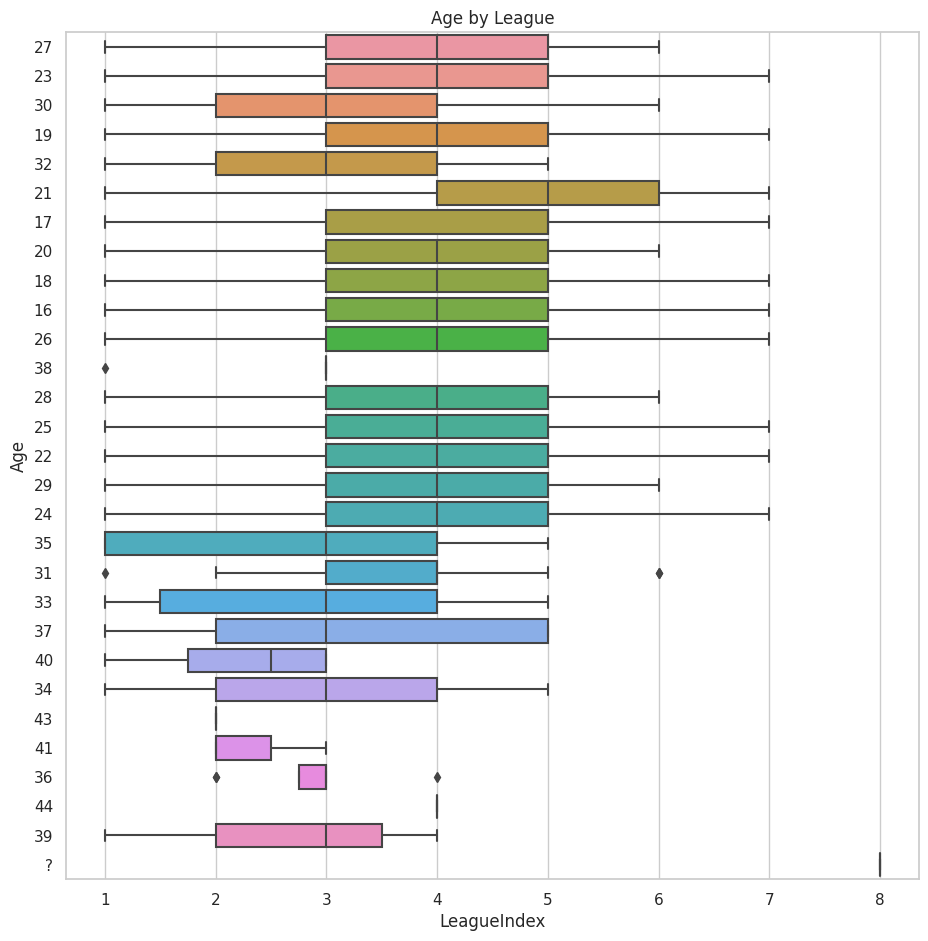

In [11]:
# Age by League
sns.set(style = "whitegrid", rc = {"figure.figsize":(11, 11)})
ax = sns.boxplot(x = "LeagueIndex", y = "Age", data = data).set_title("Age by League")

The distribution of age among the different leagues is relatively balanced or evenly spread.

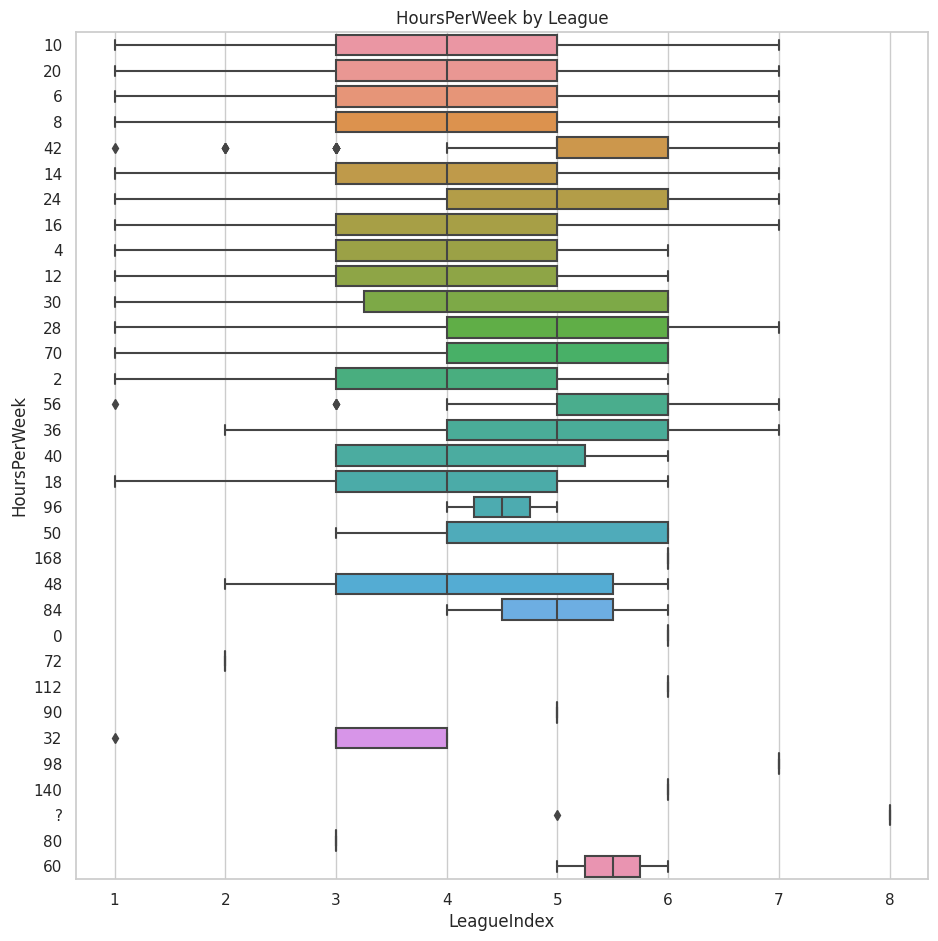

In [12]:
# HoursPerWeek by League
ax = sns.boxplot(x = "LeagueIndex", y = "HoursPerWeek", data = data).set_title("HoursPerWeek by League")

There is a positive correlation between the amount of time spent playing the game and the player's league. In other words, the more someone plays the game, the higher their league tends to be.


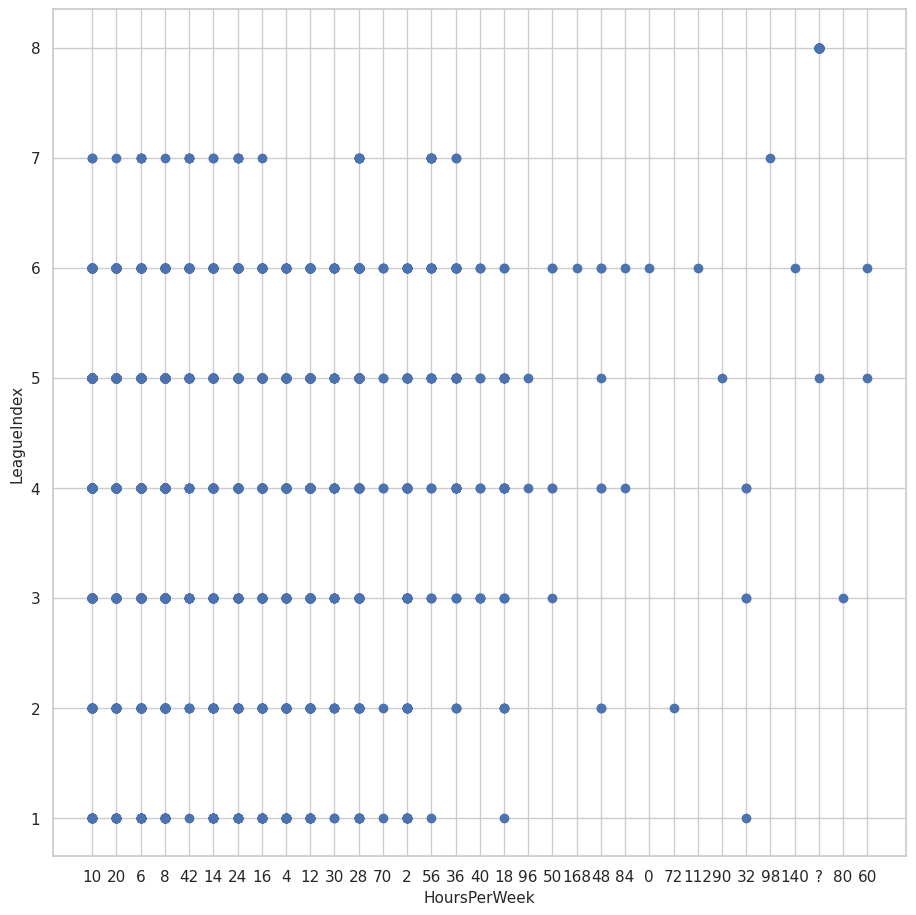

In [13]:
#scatter plot of HoursPerWeek vs rank
fig, ax = plt.subplots()
ax.scatter(x = data['HoursPerWeek'], y = data['LeagueIndex'])
plt.xlabel('HoursPerWeek', fontsize=11)
plt.ylabel('LeagueIndex', fontsize=11)
plt.show()


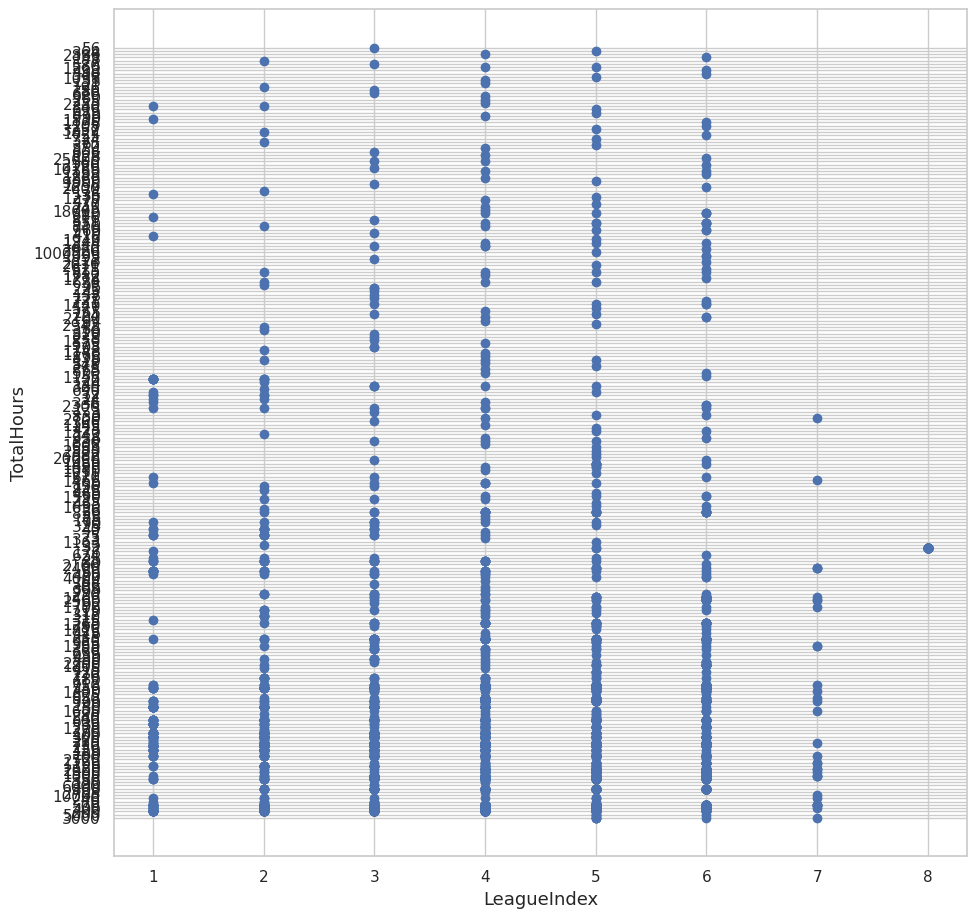

In [14]:
fig, ax = plt.subplots()
ax.scatter(y = data['TotalHours'], x = data['LeagueIndex'])
plt.xlabel('LeagueIndex', fontsize=13)
plt.ylabel('TotalHours', fontsize=13)
plt.show()

Given the information provided, it raises doubts about the effectiveness of using this dataset to accurately predict the league of data players. Since nobody reaches the level of a data with only 1000 hours of gameplay, it suggests that the dataset may primarily consist of new or inexperienced accounts. This raises concerns about the reliability and predictive power of the data for accurately determining league placement. Further evaluation and analysis may be required to assess the suitability of this dataset for league prediction in data.

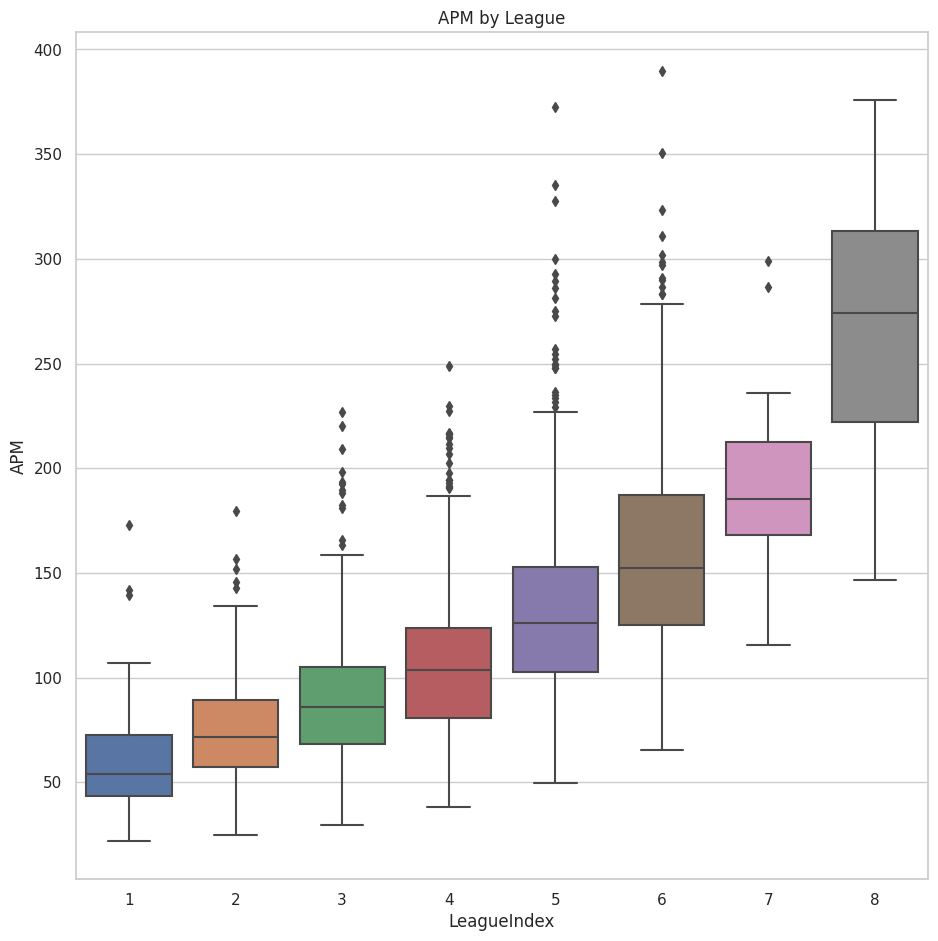

In [15]:
# APM per league
ax = sns.boxplot(x = "LeagueIndex", y = "APM", data = data).set_title("APM by League")

There appears to be a positive relationship between APM (Actions Per Minute) and league placement in data, indicating that higher APM tends to be associated with better performance and higher league rankings. This suggests that players who can execute actions more quickly and efficiently tend to achieve higher levels of gameplay and placement within the leagues.

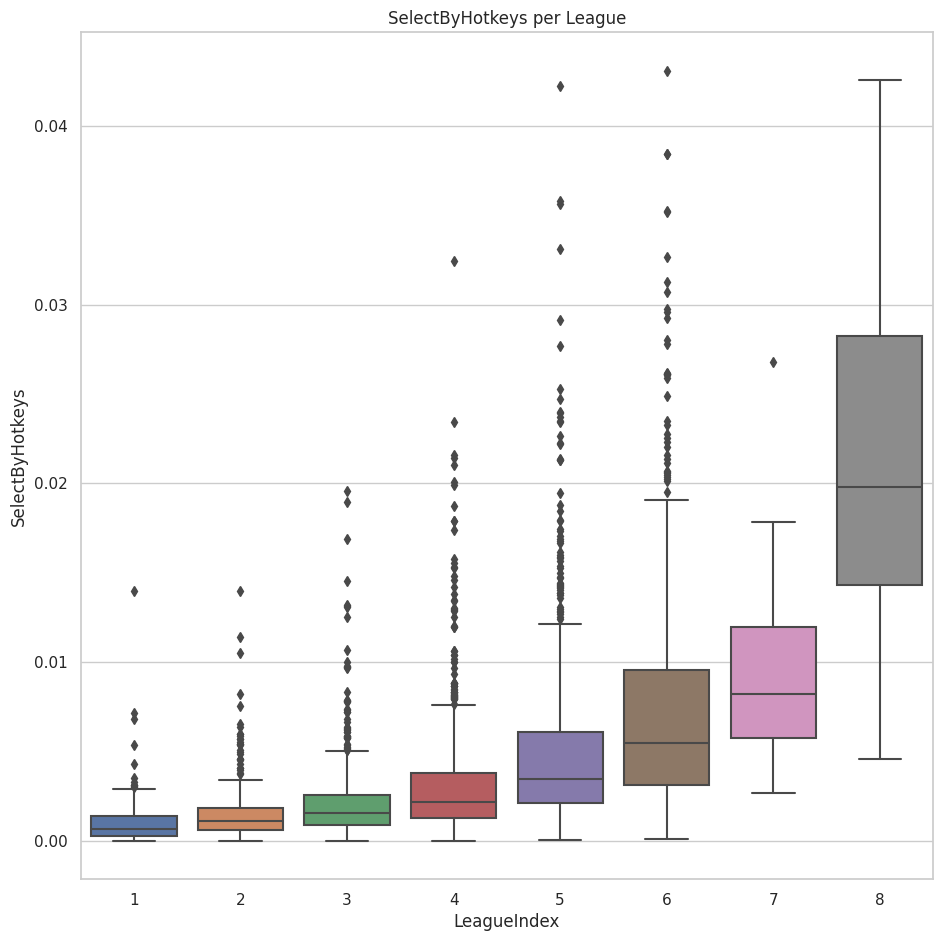

In [16]:
# SelectByHotkeys per league
ax = sns.boxplot(x = "LeagueIndex", y = "SelectByHotkeys", data = data).set_title("SelectByHotkeys per League")

Using hotkeys for selecting data elements leads to more efficient manipulation and analysis compared to constantly relying on manual clicking. Constantly clicking buttons or using menus instead of utilizing hotkeys can slow down the data handling process and reduce efficiency. By leveraging hotkeys and shortcuts, analysts can swiftly navigate through the data, select specific variables, apply operations, and perform actions more quickly. This streamlined workflow allows for faster and more precise data manipulation, leading to improved analysis and potentially better outcomes in terms of insights and decision-making.

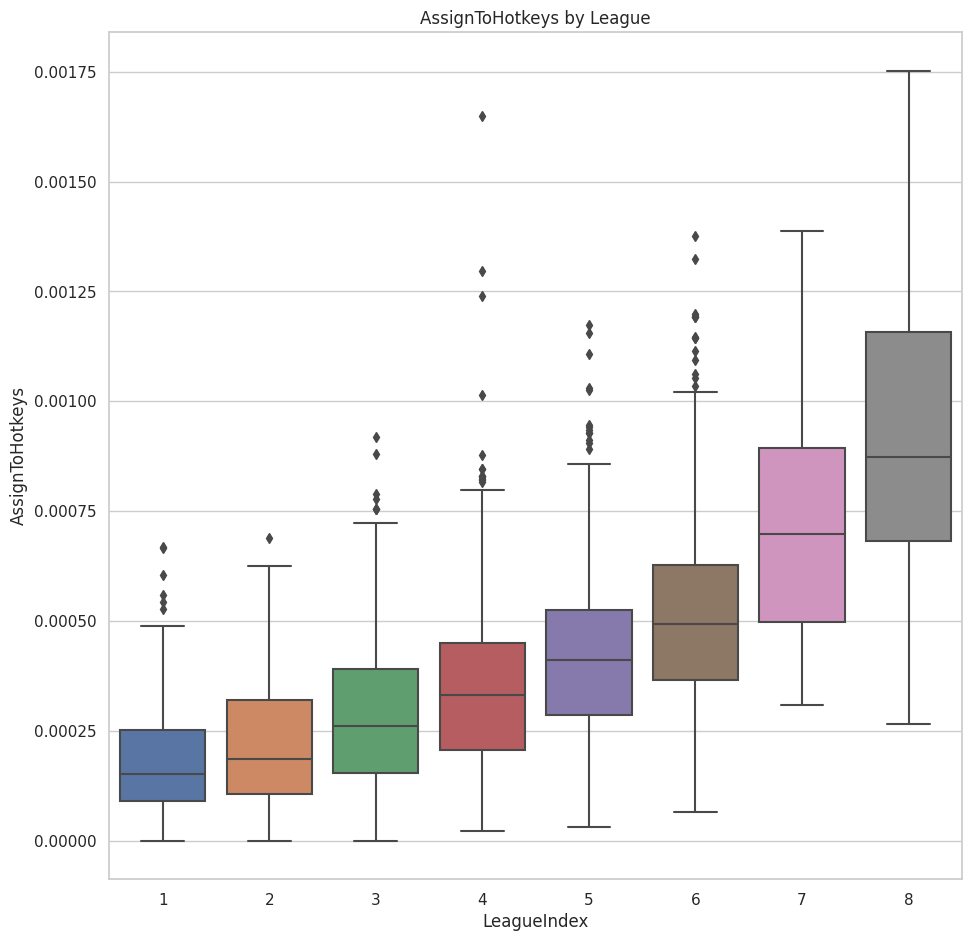

In [17]:
# AssignToHotkeys per League
ax = sns.boxplot(x = "LeagueIndex", y = "AssignToHotkeys", data = data).set_title("AssignToHotkeys by League")

According to StarCraft guides, the "select all army" hotkey is commonly used and tends to reduce the overall number of hotkeys utilized. However, it's worth noting that having more hotkeys assigned is associated with better army micro-management. In this context, higher league placements are observed among players who have a greater number of hotkeys assigned.

This suggests that players who extensively use hotkeys for army control and micro-management exhibit more advanced gameplay skills, allowing them to perform more precise and effective maneuvers with their units. These players demonstrate better control over their armies, leading to improved performance and higher league placements in StarCraft.

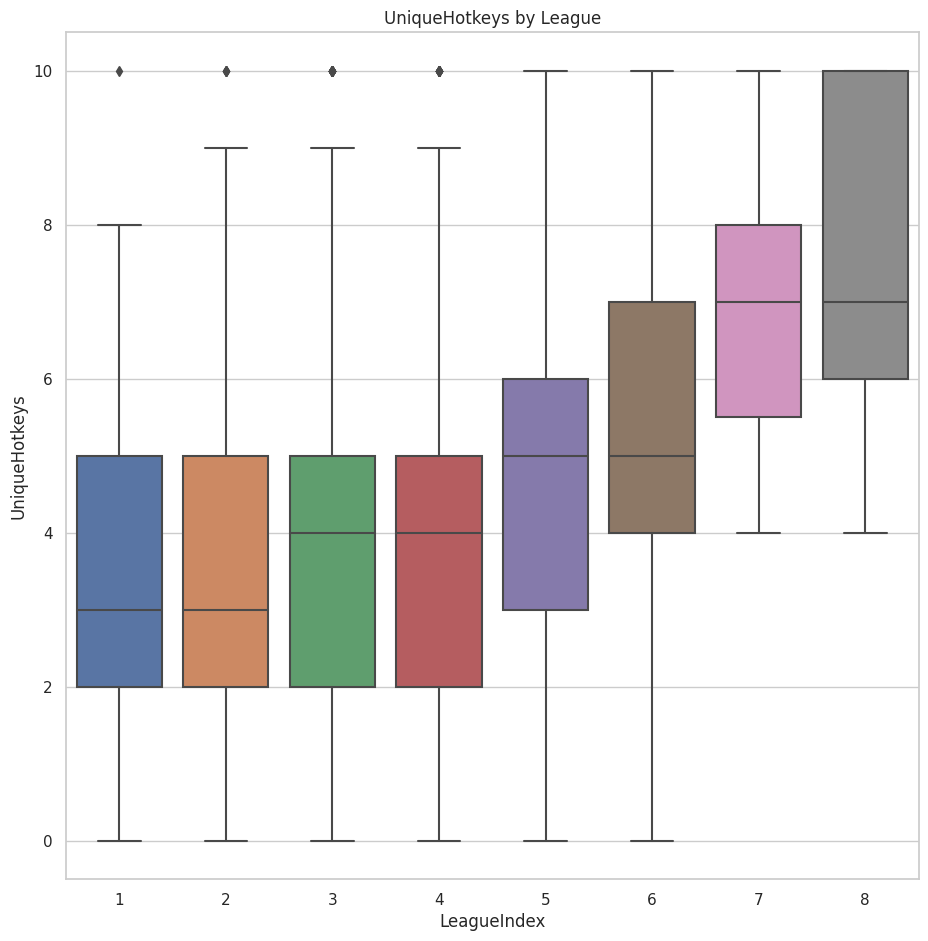

In [18]:
# UniqueHotkeys by League
ax = sns.boxplot(x = "LeagueIndex", y = "UniqueHotkeys", data = data).set_title("UniqueHotkeys by League")

When examining the data, it is observed that the mean value increases, while the interquartile ranges (IQR) remain relatively stable. This indicates that there is a general upward trend in the data, as reflected by the higher mean value. However, the spread of the data, as measured by the IQR, does not show significant changes.

The consistent interquartile ranges suggest that the overall variability of the data points within each league remains relatively constant. This implies that while the average performance or skill level may be increasing, there is no substantial shift in the dispersion or distribution of the data. The stability of the IQR suggests a consistent range of skill levels within each league, even as the mean performance improves.

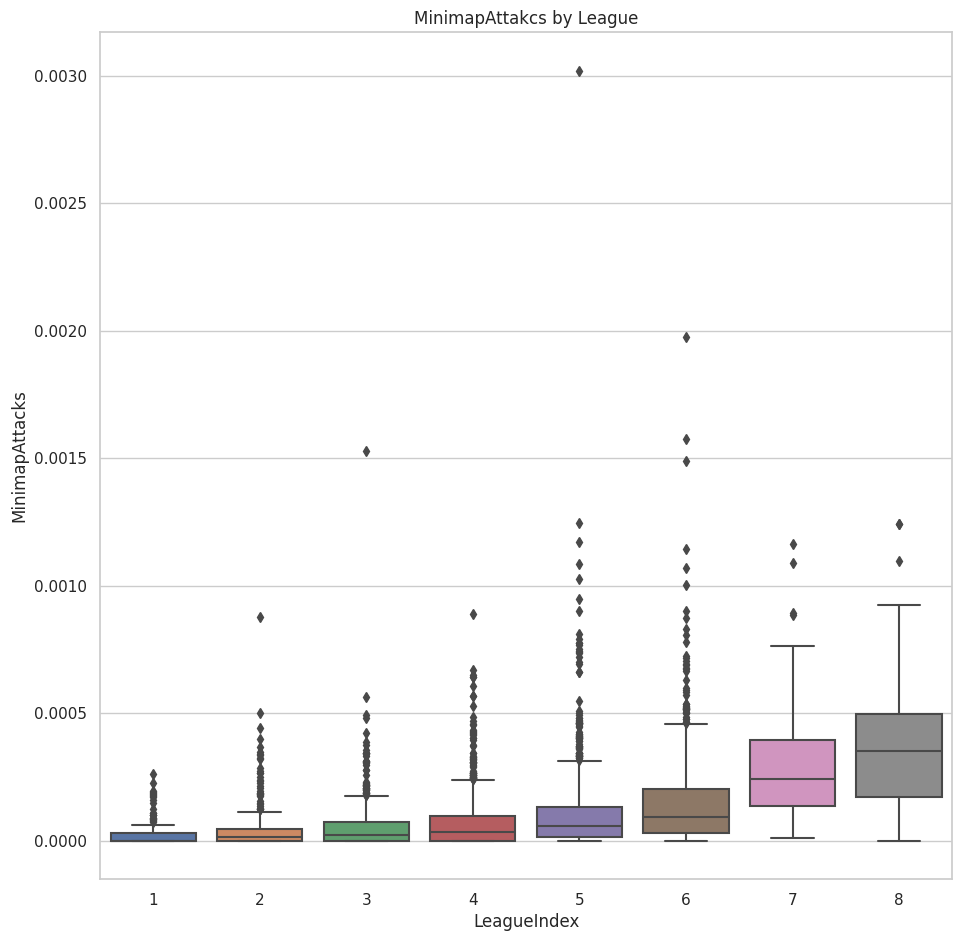

In [19]:
# MinimapAttacks by League
ax = sns.boxplot(x = "LeagueIndex", y = "MinimapAttacks", data = data).set_title("MinimapAttakcs by League")

It appears that the frequency of attacking by clicking on the minimap increases as players advance through the leagues. This can be attributed to the advantage it provides, allowing players to perform other actions while assigning their army to attack specific locations.

By utilizing minimap clicks for attacks, players can effectively multitask, focusing on other aspects of the game such as resource management, scouting, or unit production, while their army is directed to attack designated positions. This strategic approach enables players to maintain a higher level of efficiency and control over their gameplay.

As players progress to higher leagues, they tend to develop better game sense and decision-making abilities, making use of minimap attacks as a means to optimize their gameplay and gain an advantage over opponents.






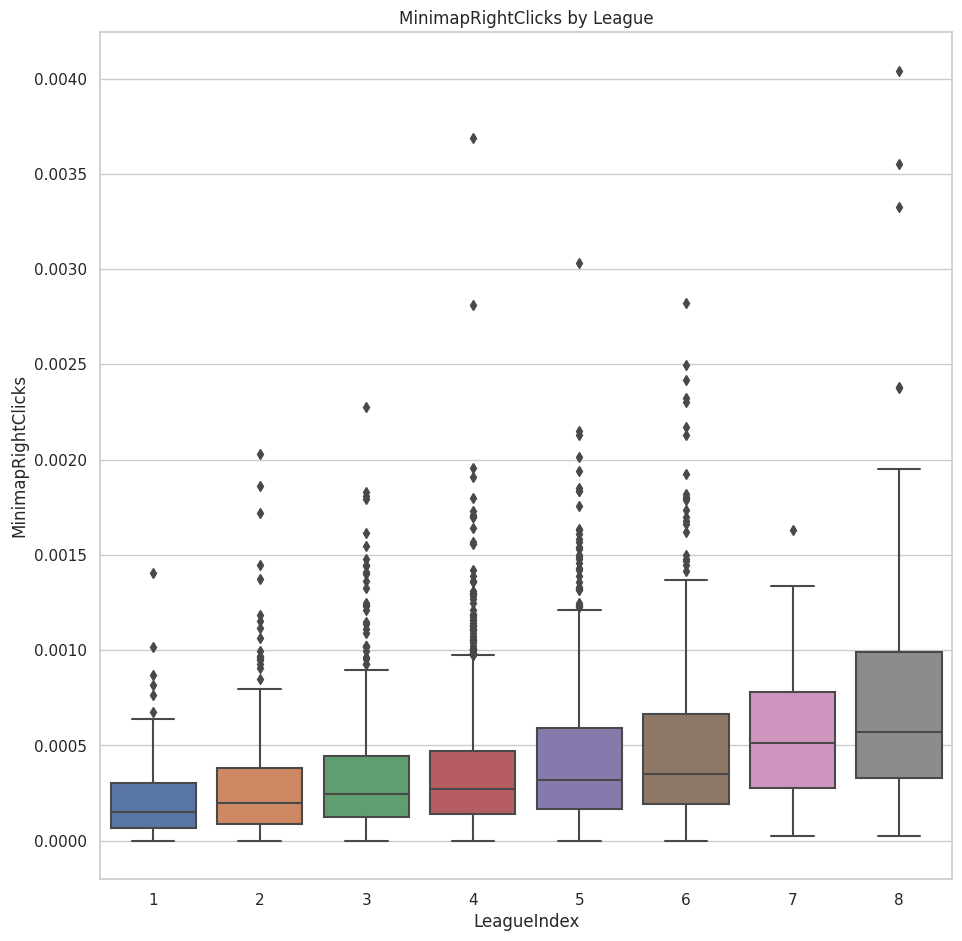

In [20]:
# MinimapRightClicks by League
ax = sns.boxplot(x = "LeagueIndex", y = "MinimapRightClicks", data = data).set_title("MinimapRightClicks by League")

Attacking via minimap enables greater efficiency and multitasking in gameplay, allowing players to quickly and precisely direct their armies while focusing on other tasks simultaneously.

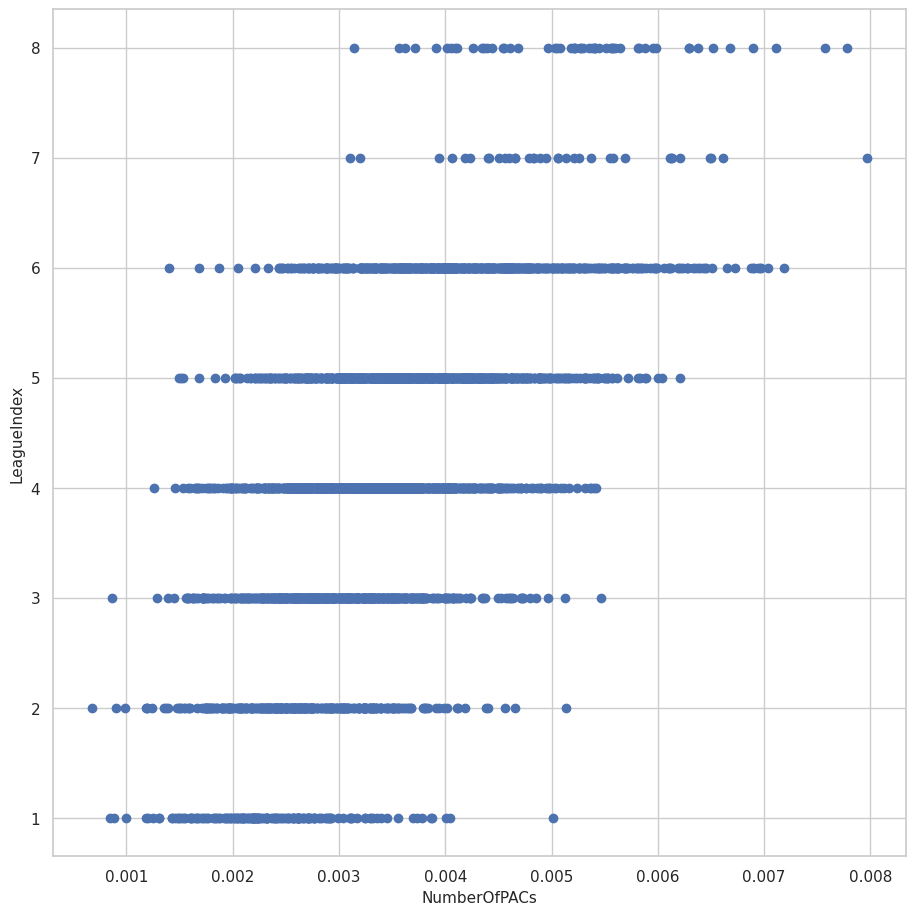

In [21]:
#scatter plot of NumberOfPACs vs rank
fig, ax = plt.subplots()
ax.scatter(x = data['NumberOfPACs'], y = data['LeagueIndex'])
plt.xlabel('NumberOfPACs', fontsize=11)
plt.ylabel('LeagueIndex', fontsize=11)
plt.show()

The Perception Action Cycle (PAC), which involves moving the camera to different areas, executing actions, and then shifting the camera to another location, plays a significant role in gameplay. A higher PAC indicates a shorter time to assess and respond to the situation in each area, leading to improved decision-making and potentially higher league placement. By swiftly navigating the camera, players can gather information, plan strategies, and execute actions more efficiently, giving them a competitive edge in the game.

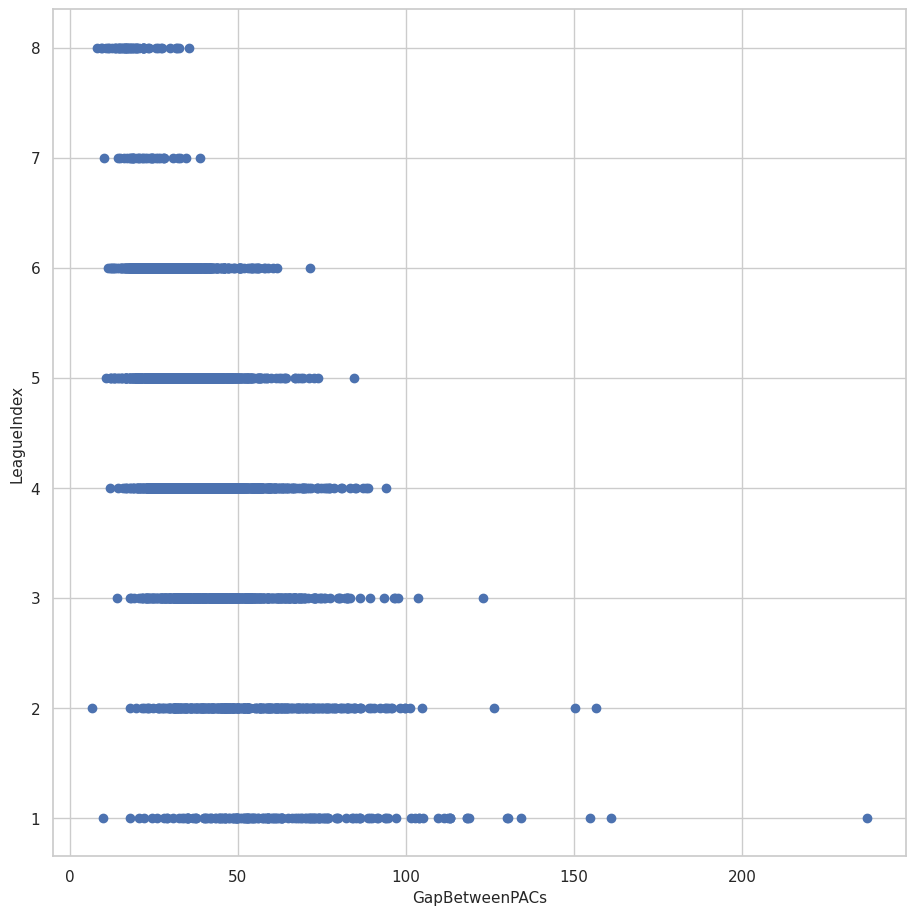

In [22]:
#scatter plot of GapBetweenPACs vs rank
fig, ax = plt.subplots()
ax.scatter(x = data['GapBetweenPACs'], y = data['LeagueIndex'])
plt.xlabel('GapBetweenPACs', fontsize=11)
plt.ylabel('LeagueIndex', fontsize=11)
plt.show()

Having shorter gaps between actions signifies less time spent contemplating and more time dedicated to executing decisions. This efficient decision-making process, characterized by shorter gaps, is associated with higher league placement. By minimizing the delay between actions, players can maintain a constant momentum, capitalize on opportunities, and respond swiftly to the evolving gameplay dynamics. This proactive approach allows for better utilization of game time and resources, resulting in improved performance and potentially leading to higher league rankings.

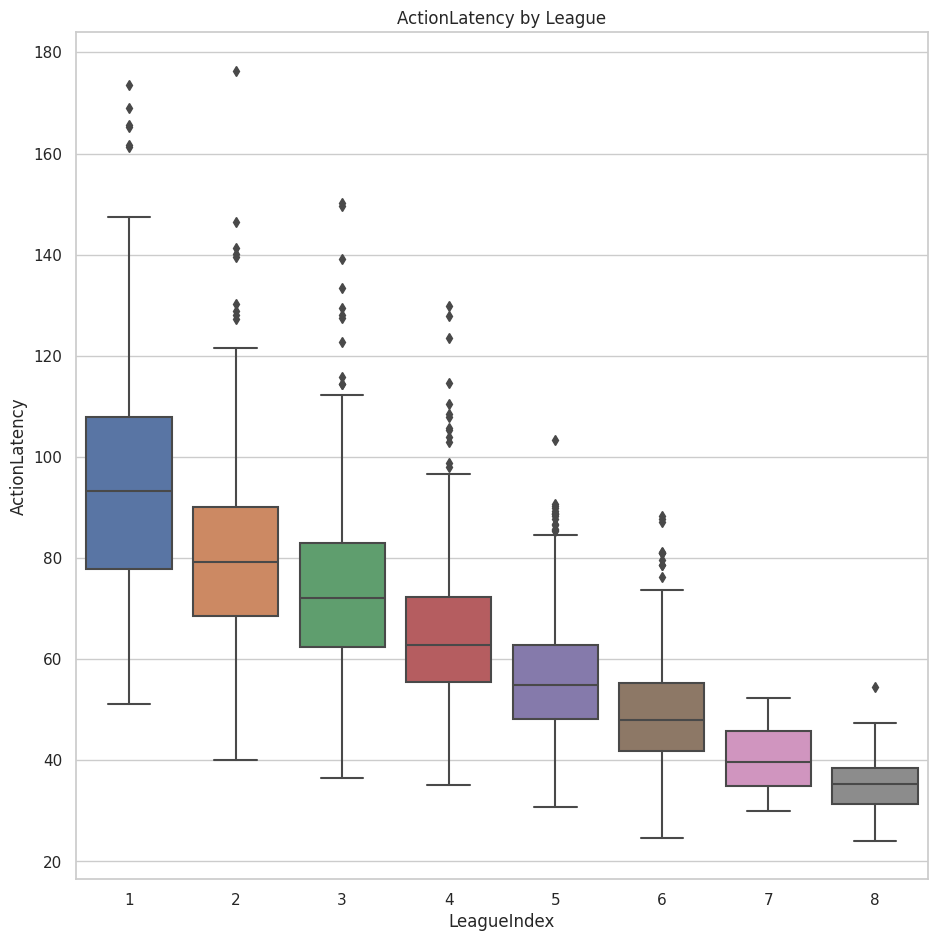

In [23]:
# ActionLatency by League
ax = sns.boxplot(x = "LeagueIndex", y = "ActionLatency", data = data).set_title("ActionLatency by League")

The time required between moving the camera to an area and initiating an action, often referred to as action latency, has a significant impact on gameplay. Lower action latency is indicative of a better understanding of the game mechanics and improved muscle memory, which can contribute to a higher league placement.

Reduced action latency implies quicker decision-making and execution of actions, indicating a higher level of proficiency and familiarity with the game. Players with lower action latency can swiftly identify optimal strategies, anticipate opponents' moves, and react promptly to in-game situations. This faster response time provides a competitive advantage, leading to more efficient gameplay and potentially achieving higher league rankings.

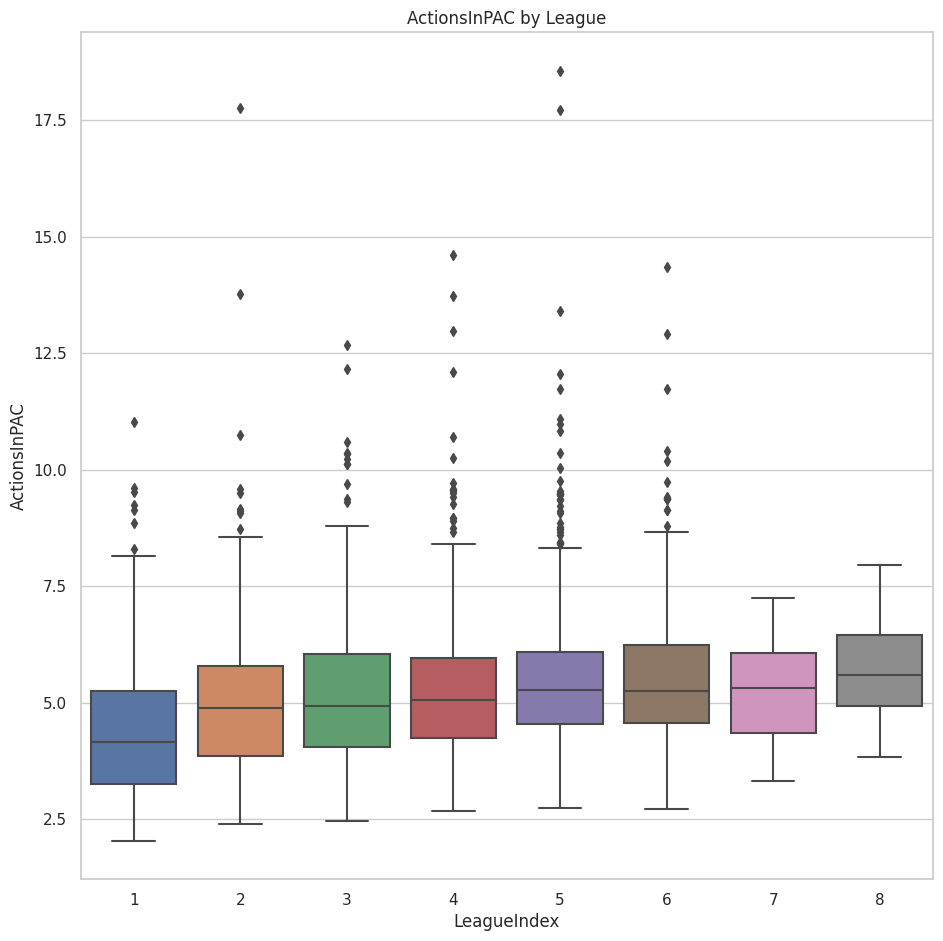

In [24]:
# ActionsInPAC by League
ax = sns.boxplot(x = "LeagueIndex", y = "ActionsInPAC", data = data).set_title("ActionsInPAC by League")


The correlation between lower action latency and higher league placement is not significant. While quicker execution of actions is important, it is more crucial to make the right decisions and manage resources effectively in order to succeed in higher leagues.

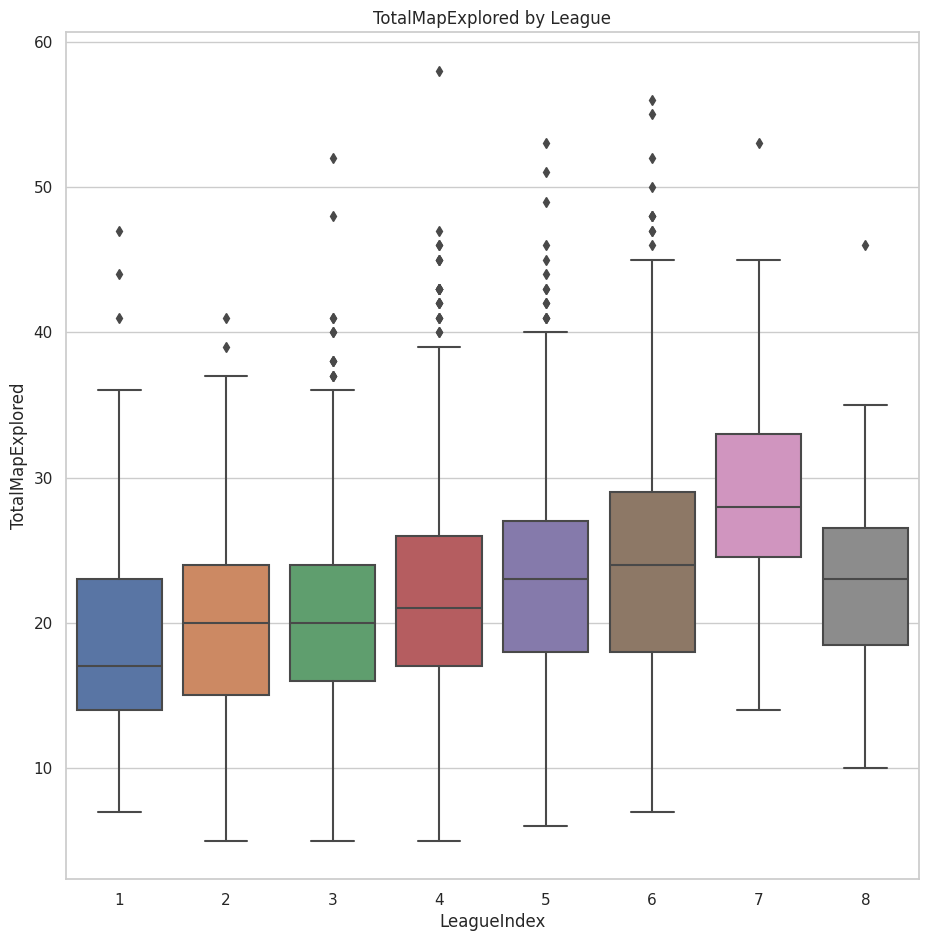

In [25]:
# TotalMapExplored by League
ax = sns.boxplot(x = "LeagueIndex", y = "TotalMapExplored", data = data).set_title("TotalMapExplored by League")


There is a positive correlation between a higher league placement and a greater extent of map exploration. This is likely because scouting becomes more emphasized as players progress through the leagues. Understanding what your opponent is doing is crucial for effective strategy and counterplay. Failing to scout and gather information about your opponent's actions can put you at a disadvantage, as you won't be able to adapt and respond accordingly. Therefore, players in higher leagues tend to place a greater emphasis on map exploration and scouting to gain insights into their opponent's intentions and make informed decisions.

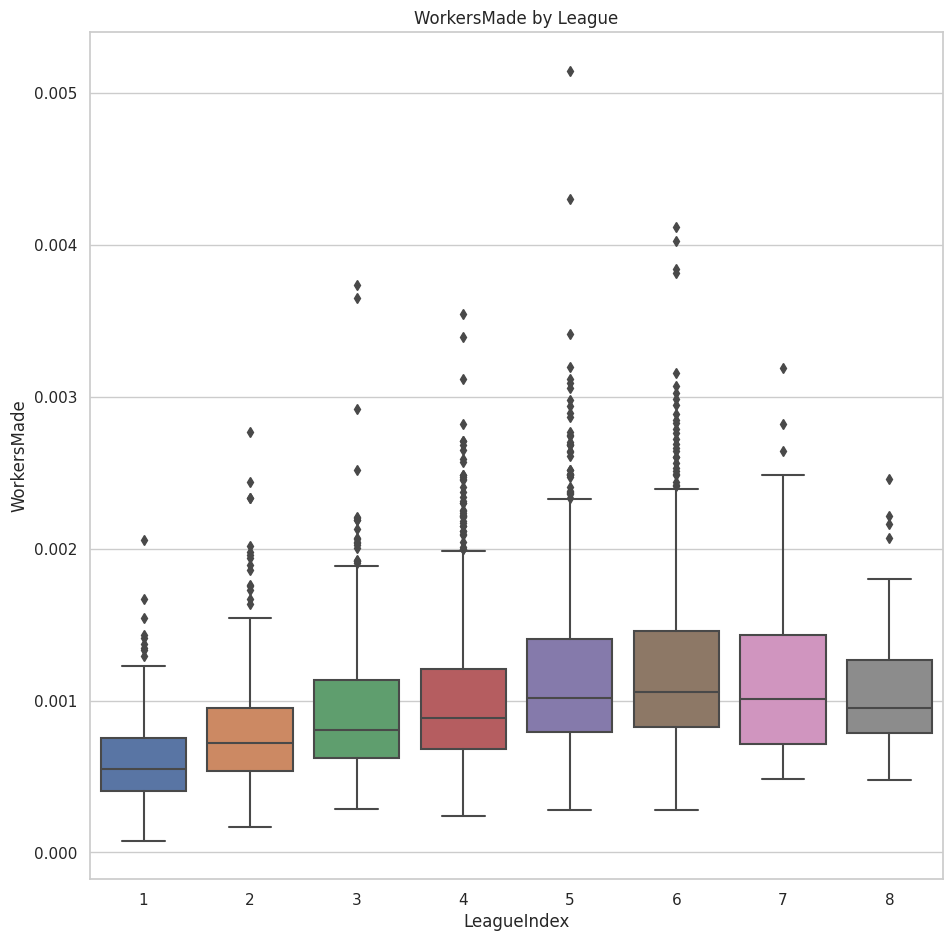

In [26]:
# WorkersMade by League
ax = sns.boxplot(x = "LeagueIndex", y = "WorkersMade", data = data).set_title("WorkersMade by League")

Consistently producing workers is key to higher league placement as it leads to increased resource gathering, better building capabilities, and a stronger economy.

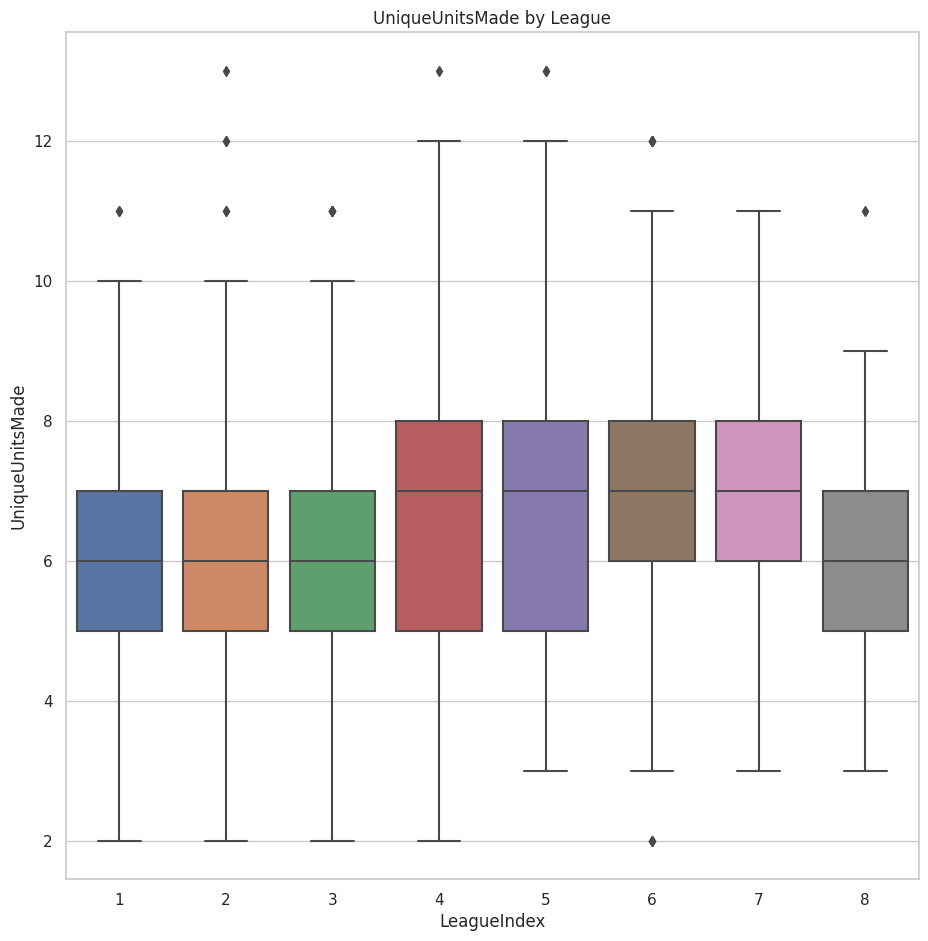

In [27]:
# UniqueUnitsMade by League
ax = sns.boxplot(x = "LeagueIndex", y = "UniqueUnitsMade", data = data).set_title("UniqueUnitsMade by League")

The correlation between the number of different units that can be built for each race and league placement is not significant. Since there is a limited variety of units available for each race, the difference in unit options does not have a substantial impact on league placement.

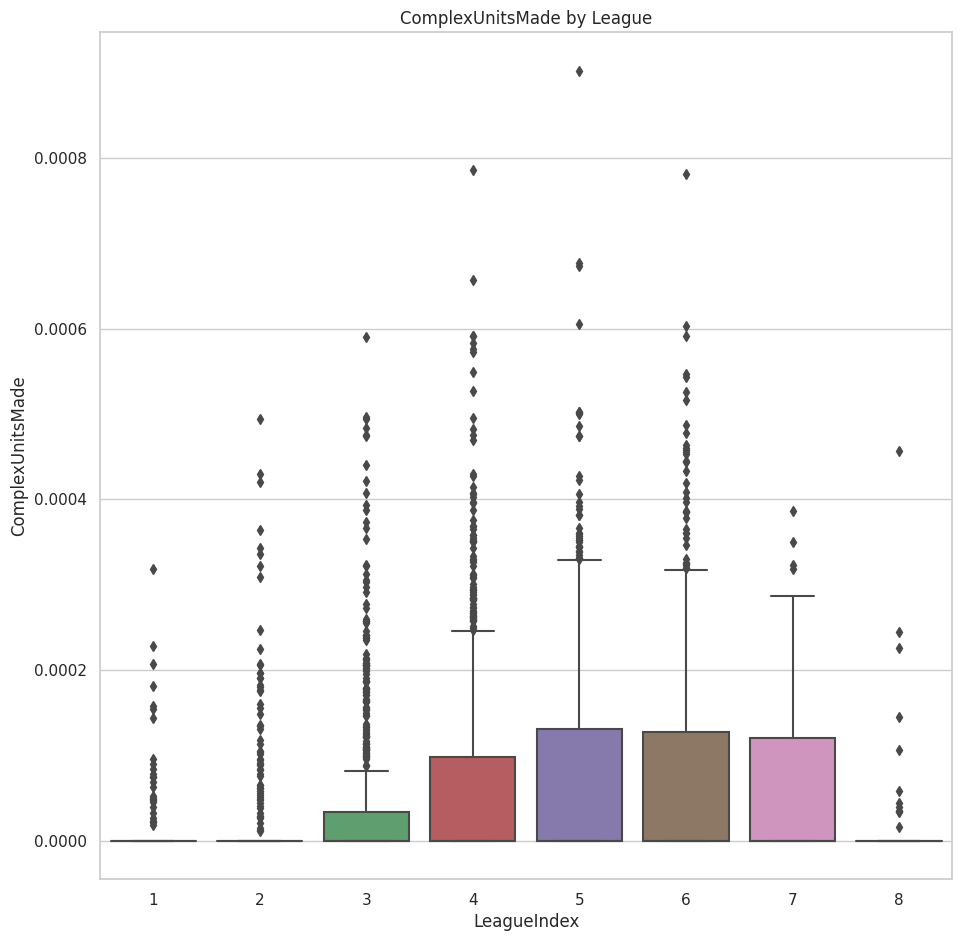

In [28]:
# ComplexUnitsMade by League
ax = sns.boxplot(x = "LeagueIndex", y = "ComplexUnitsMade", data = data).set_title("ComplexUnitsMade by League")

Complex units like infestors, and high templar require greater skill, but their average usage remains consistent across leagues.

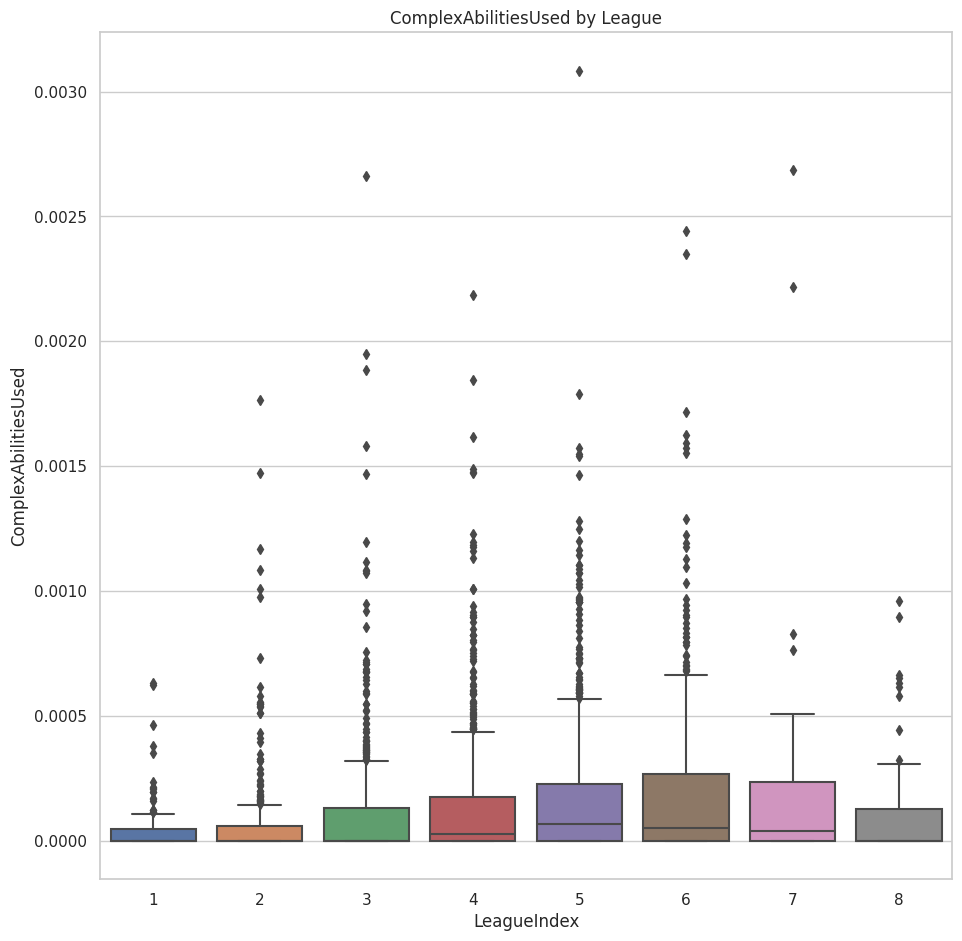

In [29]:
# ComplexAbilitiesUsed by League
ax = sns.boxplot(x = "LeagueIndex", y = "ComplexAbilitiesUsed", data = data).set_title("ComplexAbilitiesUsed by League")


There is a moderate correlation between the complexity of actions required for certain units (such as specific targeting) and their usage increasing with higher leagues. However, the difference in usage between leagues is not substantial.

mu = 4.18 and sigma = 1.52



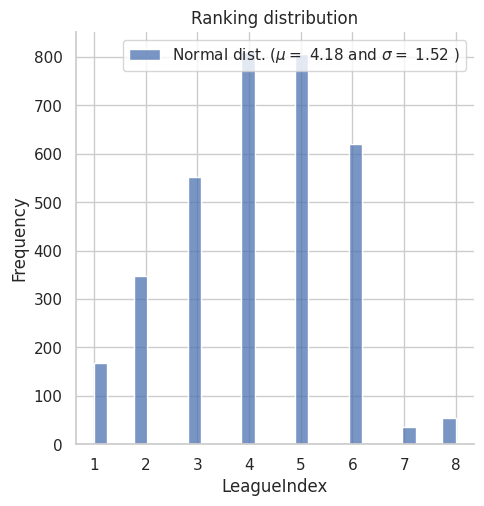

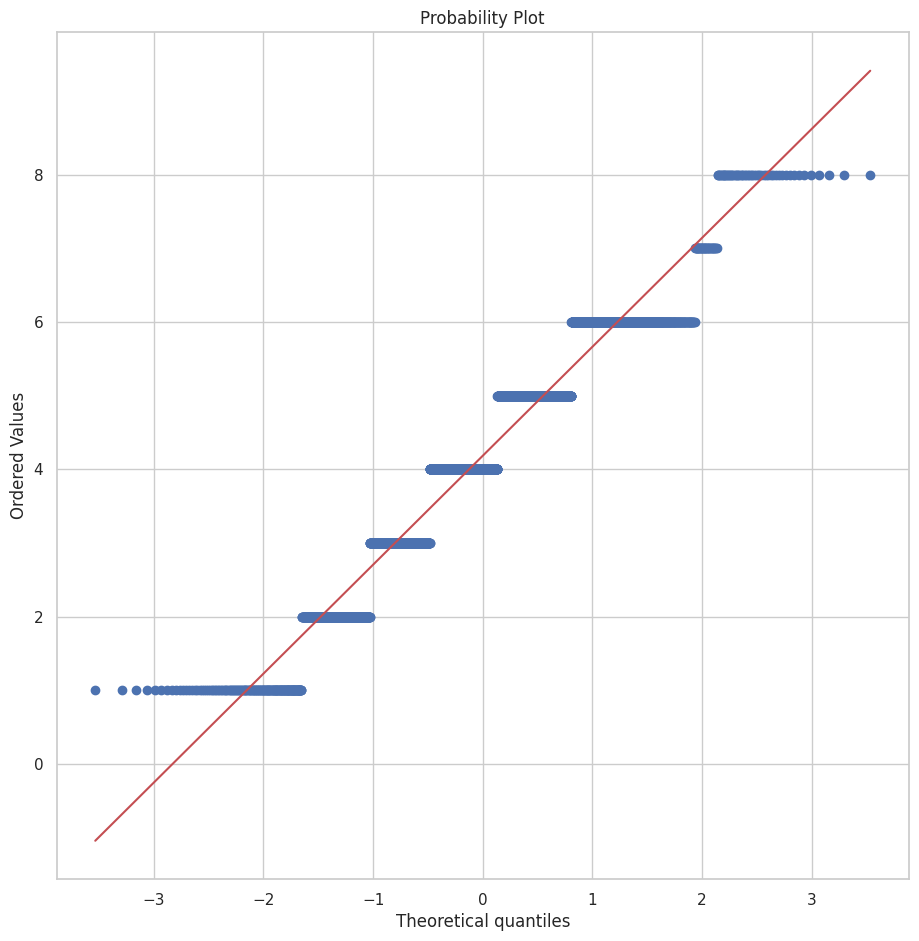

In [30]:
sns.displot(data['LeagueIndex']);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['LeagueIndex'])
print( 'mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Ranking distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['LeagueIndex'], plot=plt)
plt.show()

The distribution of the 'LeagueIndex' data is visualized using a histogram, a fitted normal distribution curve, and a QQ-plot to assess its normality. The plot includes a legend displaying information about the fitted normal distribution, with the y-axis representing frequency. The title of the plot is set as 'Ranking distribution'. Based on the analysis, it appears that the 'LeagueIndex' data follows a fairly normal distribution, suggesting that no transformations are necessary.

<ipython-input-31-558b635ff98f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

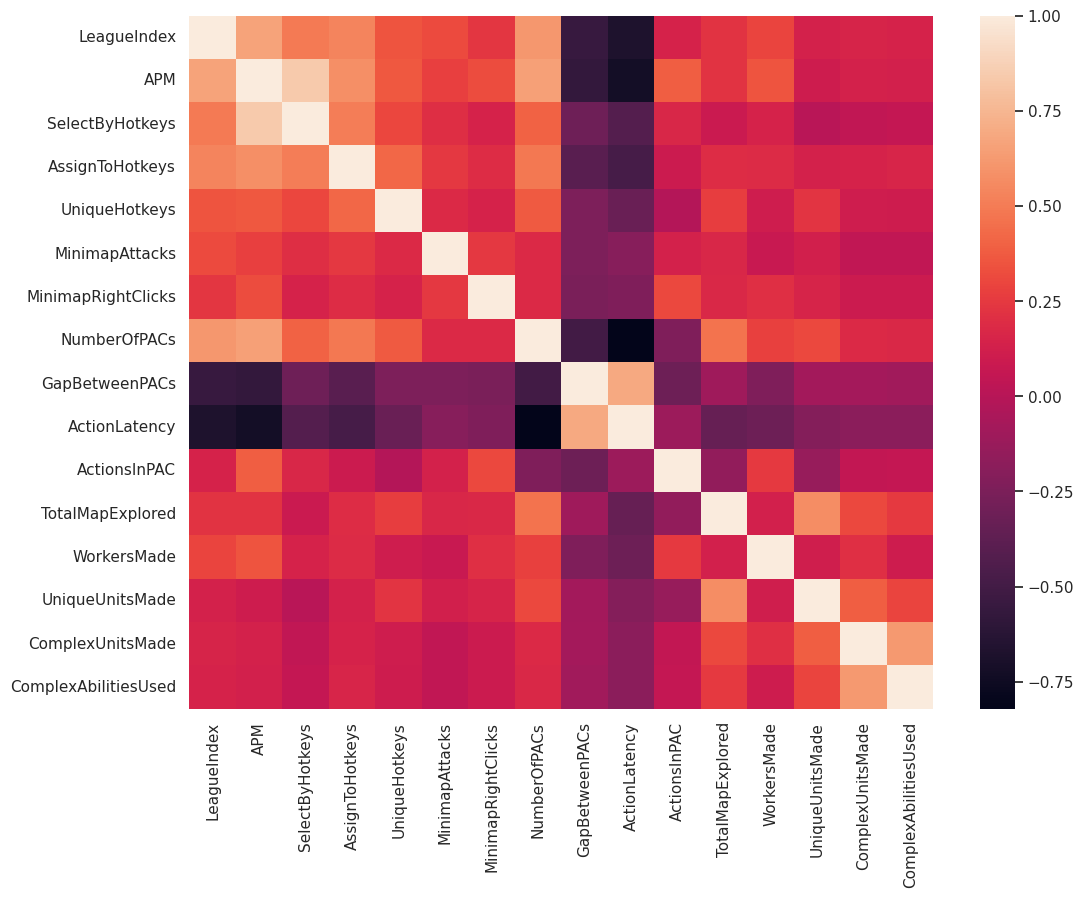

In [31]:
#Correlation map to see how features are correlated with LeagueIndex
corr_matrix = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix)

The correlation matrix of the 'data' dataset is computed and visualized using a heatmap. The heatmap displays the correlations between variables, with lighter colors indicating stronger correlations. In this analysis, the variables APM, NumberofPACs, and AssigntoHotkeys emerge as the best predictors.

It is noted that all the data in the dataset is numerical, with the exception of Age, which is considered as numerical for this analysis. The variable LeagueIndex is dropped from the dataset, as it is the target variable that we aim to predict.

In [32]:
print("The data size before dropping LeagueIndex is : {} ".format(data.shape))
y_data = data['LeagueIndex']
data.drop(['LeagueIndex'], axis=1, inplace=True)
print("data size is without LeagueIndex : {}".format(data.shape))

The data size before dropping LeagueIndex is : (3395, 19) 
data size is without LeagueIndex : (3395, 18)


In [33]:
#Find all the NA values and print them out in a percentage

data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


mu = 117.05 and sigma = 51.94



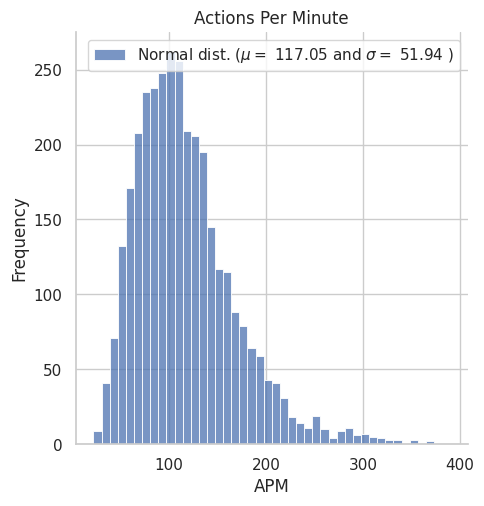

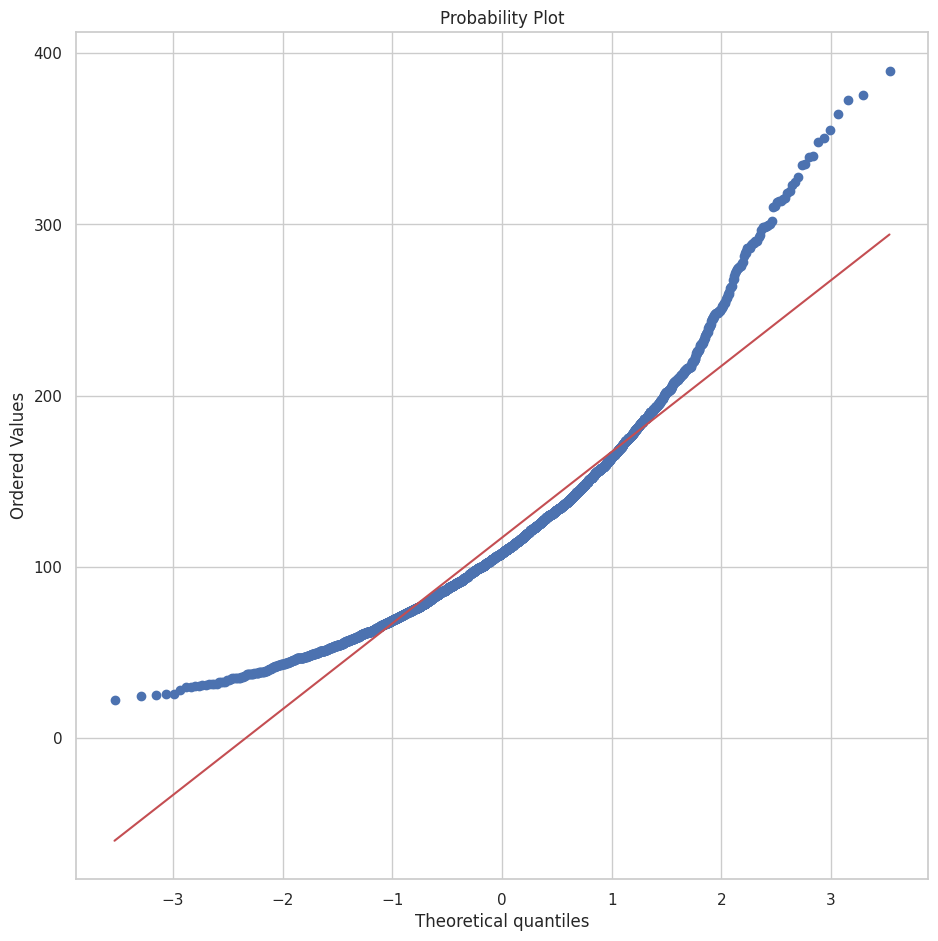

In [34]:
sns.displot(data['APM']);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['APM'])
print( 'mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Actions Per Minute')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['APM'], plot=plt)
plt.show()

The distribution of the 'APM' (Actions Per Minute) data is analyzed, utilizing a histogram, a fitted normal distribution curve, and a QQ-plot to evaluate its normality.

Upon examination, it is observed that the distribution of the 'APM' data is slightly skewed. To gain a comprehensive understanding of the skewness, the entire dataset will be considered. Based on this assessment, a transformation can be applied uniformly across the data to address the skewness issue.

In [35]:
# check Skewness in the data
numeric_feats = data.dtypes[data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)

Skew in numerical features: 



,Skew
MinimapAttacks,4.817033
ComplexAbilitiesUsed,3.777185
SelectByHotkeys,2.964019
MinimapRightClicks,2.562687
ComplexUnitsMade,2.300387
GapBetweenPACs,1.907439
WorkersMade,1.660670
ActionsInPAC,1.598343
APM,1.203918
ActionLatency,1.151147


The skewness of the 'Total Hours' data indicates a potential issue with its accuracy and reliability. As a result, it is suggested that the 'Total Hours' variable be dropped from the dataset.

To address the skewness in other variables, such as 'APM,' a transformation can be applied. In this case, the LOG-LOG transformation is chosen. This transformation can help normalize the data and mitigate the impact of skewness.

Before proceeding with the transformation, it is recommended to remove the 'Total Hours' variable from the dataset. This will ensure that inaccurate or unreliable data does not affect the subsequent analysis.

In [36]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Log-Log transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat] = np.log1p(data[feat])

There are 15 skewed numerical features to Log-Log transform


The numerical features in the 'data' dataset are identified and their skewness is measured. This analysis provides insights into the distributional characteristics and potential asymmetry of the variables. By examining the skewness values, we can determine the extent of deviation from a symmetric distribution for each variable in the dataset.

<ipython-input-37-f4d4aa224d21>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['APM'] , fit=norm);



 mu = 4.68 and sigma = 0.43



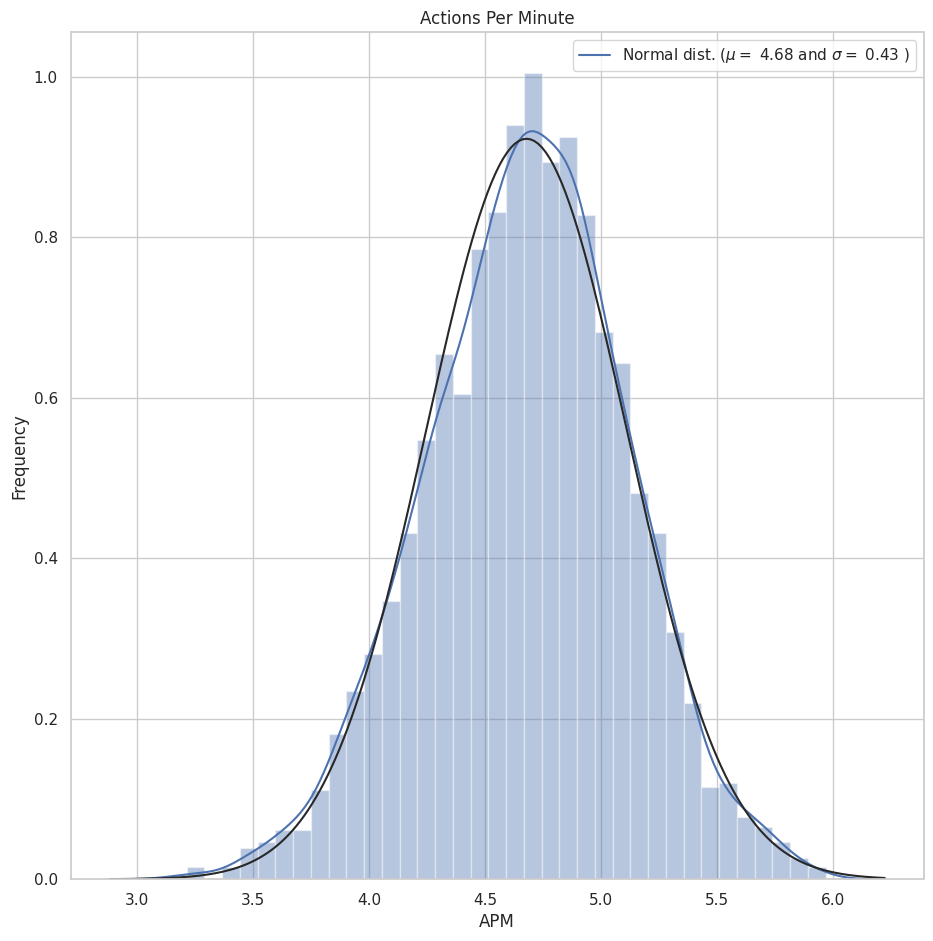

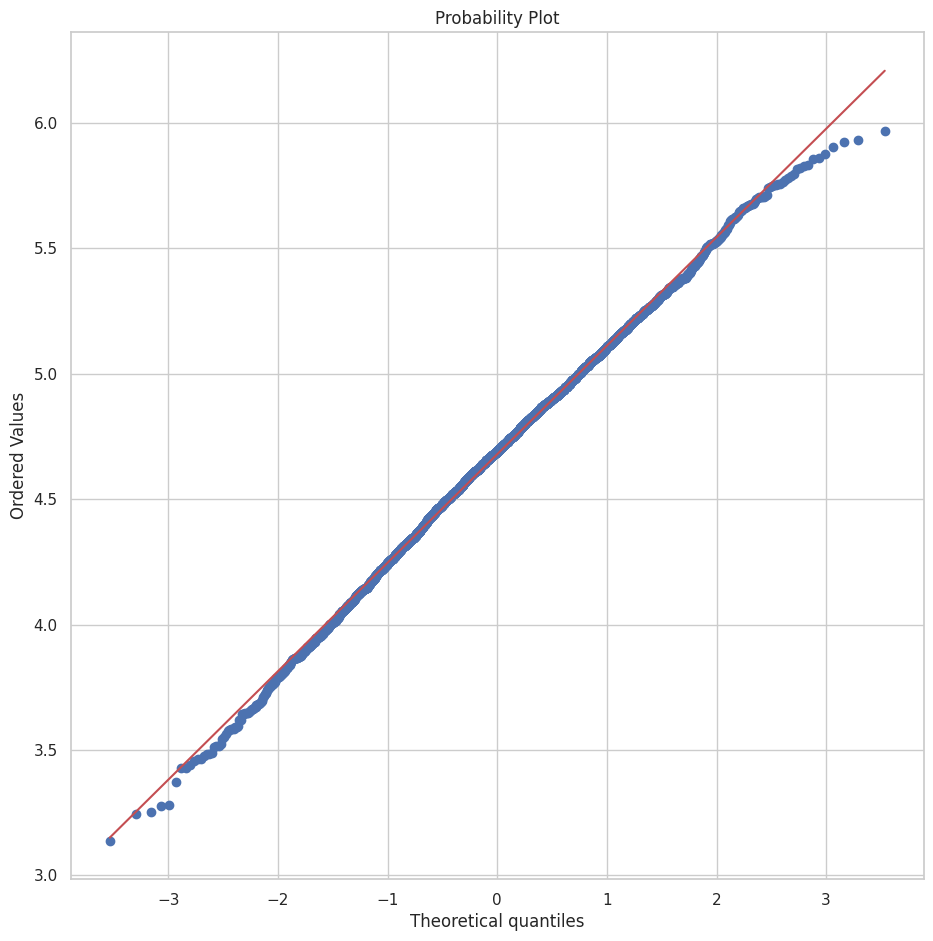

In [37]:
sns.distplot(data['APM'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['APM'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Actions Per Minute')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['APM'], plot=plt)
plt.show()

Great progress! To prepare for modeling, the dataset can be split into a training set and a testing set. The training set will be used to train the model, while the testing set will serve as an independent dataset to evaluate the model's performance and generalization ability. By splitting the data, we can assess how well the model performs on unseen data, helping us determine its effectiveness and reliability.

In [38]:
# ntrain is the number of training data
# 3338*0.2 = 667 , so lets set ntrain to 3338-667 = 2671 for an 80/20 split
N_train  = 2671
train = data[:N_train]
test = data[N_train:]
y_train = y_data[:N_train]
y_test = y_data[N_train:]

In [39]:
print(train.shape)
print(test.shape)
print(y_train.shape)
print(y_test.shape)

(2671, 18)
(724, 18)
(2671,)
(724,)


# Modelling
Now lets model, Import all the libraries we need here

In [40]:
from sklearn.linear_model import  BayesianRidge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
# scikit-learn for naive-bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
# support vector machine
from sklearn import svm

In [41]:
data_=data.replace(to_replace='?')

In [42]:
data_['Age']= pd.to_numeric(data_['Age'])
data_['HoursPerWeek']= pd.to_numeric(data_['HoursPerWeek'])
data_['TotalHours']= pd.to_numeric(data_['TotalHours'])


In [43]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3395 non-null   int64  
 1   HoursPerWeek          3395 non-null   int64  
 2   TotalHours            3395 non-null   int64  
 3   APM                   3395 non-null   float64
 4   SelectByHotkeys       3395 non-null   float64
 5   AssignToHotkeys       3395 non-null   float64
 6   UniqueHotkeys         3395 non-null   float64
 7   MinimapAttacks        3395 non-null   float64
 8   MinimapRightClicks    3395 non-null   float64
 9   NumberOfPACs          3395 non-null   float64
 10  GapBetweenPACs        3395 non-null   float64
 11  ActionLatency         3395 non-null   float64
 12  ActionsInPAC          3395 non-null   float64
 13  TotalMapExplored      3395 non-null   float64
 14  WorkersMade           3395 non-null   float64
 15  UniqueUnitsMade      

In [44]:
y_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3395 entries, 0 to 3394
Series name: LeagueIndex
Non-Null Count  Dtype
--------------  -----
3395 non-null   int64
dtypes: int64(1)
memory usage: 26.6 KB


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_, y_data, test_size=0.2, random_state=42)

In [46]:
#Validation function
n_folds = 5
def rmsle(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [47]:
SGD = make_pipeline(StandardScaler(), SGDRegressor(loss = 'huber', max_iter=100000, tol=1e-7, learning_rate = 'invscaling', eta0 = 0.001))
GBoost = GradientBoostingRegressor(n_estimators=1000,
                                   learning_rate=0.02,
                                   max_depth=10,
                                   max_features='sqrt',
                                   min_samples_leaf=15,
                                   min_samples_split=5, 
                                   loss='huber',
                                   random_state =42)

In [48]:
xgb_reg = make_pipeline(StandardScaler(), xgb.XGBRegressor(n_estimators=50))

In [49]:
score = rmsle(xgb_reg)
print("XGB regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGB regressor score: 0.9728 (0.0332)



In [50]:
#X_train.corr()

In [51]:
score = rmsle(SGD)
print("SGD score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

SGD score: 3.9376 (5.8673)



In [52]:
score = rmsle(GBoost)
print("Gradient boosting score: {:.2f} ({:.2f})\n".format(score.mean(), score.std()))

Gradient boosting score: 0.9168 (0.0240)



In [53]:
# ensemble 

In [54]:
xgb_reg.fit(X_train.values, y_train)
stacked_train_pred = xgb_reg.predict(X_train.values)
stacked_pred = xgb_reg.predict(X_test.values)
np.sqrt(mean_squared_error(y_train, stacked_train_pred))
#print(rmsle(y_train, stacked_train_pred))

0.34167297889722054

In [55]:
SGD.fit(X_train.values, y_train)
stacked_train_pred = SGD.predict(X_train.values)
stacked_pred = SGD.predict(X_test.values)
np.sqrt(mean_squared_error(y_train, stacked_train_pred))

0.9863081266560693

In [56]:
GBoost.fit(X_train.values, y_train)
stacked_train_pred = GBoost.predict(X_train.values)
stacked_pred = GBoost.predict(X_test.values)
np.sqrt(mean_squared_error(y_train, stacked_train_pred))

0.24248890139442697

In [57]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.base import clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # We define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        # Generate predictions from each cloned model
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        
        # Average the predictions across models
        return np.mean(predictions, axis=1)


In [58]:
averaged_models = AveragingModels(models = (GBoost,xgb_reg))
score = rmsle(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.9267 (0.0286)



In [59]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [60]:
averaged_models.fit(X_train.values, y_train)
stacked_train_pred = averaged_models.predict(X_train.values)
stacked_pred = averaged_models.predict(X_test.values)
print(rmsle(y_train, stacked_train_pred))

0.2760697335572285


In [61]:
stacked_pred_rounded = np.round(stacked_pred, 0)

In [62]:
print(mean_absolute_error(y_test, stacked_pred))
print(mean_absolute_error(y_test, stacked_pred_rounded))

0.7279731305984586
0.6921944035346097


#Some Other models to see




## Naive Bayes Classification
For the multinomial classification task, a simple model can be developed. As part of the model preparation, certain columns that are deemed to have limited impact on the outcome can be dropped from the dataset. This step helps streamline the analysis and focuses on the most relevant features that are likely to contribute significantly to the classification task. By removing these columns, the model can be built with a more targeted set of features, enhancing its performance and interpretability.

In [63]:
"""# feature cleanup
drops = ["GameID", "Age", "TotalHours", "UniqueUnitsMade", "ComplexUnitsMade", "ComplexAbilitiesUsed"]

data.drop(drops, axis = 1, inplace = True)
data.head()"""

'# feature cleanup\ndrops = ["GameID", "Age", "TotalHours", "UniqueUnitsMade", "ComplexUnitsMade", "ComplexAbilitiesUsed"]\n\ndata.drop(drops, axis = 1, inplace = True)\ndata.head()'

In [64]:
# fit the model
clf = MultinomialNB()

# train the model
model_1 = clf.fit(X_train, y_train)
# predictions
predictions_1 = clf.predict(X_test)

# view predictions
print(predictions_1[:10])

# compare results
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_1), 2))

[3 8 1 8 2 1 5 1 1 1]
Classification Accuracy:  0.23


#SVM

In [65]:
# build the model
clf3 = svm.SVC(gamma = 0.00001, decision_function_shape = "ovr")

# fit the model
model_3 = clf3.fit(X_train, y_train)
# predictions
predictions_3 = clf3.predict(X_test)

print(predictions_3[:10])
# compare results
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_3), 2))

[4 4 2 4 4 2 6 4 2 2]
Classification Accuracy:  0.33


# Random Forest

In [66]:
# build the model
clf2 = RandomForestClassifier(n_estimators = 64, random_state = 123)

# fit the model
model_2 = clf2.fit(X_train, y_train)

In [67]:
# predictions
predictions_2 = clf2.predict(X_test)

# view them
print(predictions_2[:10])

# compare results
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_2), 2))

[4 8 1 4 3 4 5 5 3 4]
Classification Accuracy:  0.41


#findings to non-technical stakeholders.

Our dataset currently only has 3395 rows of data,
 which was when it was collected, The current dataset has limitations that need to be addressed for more accurate predictions of player league placements. Firstly, the dataset's size is relatively small, representing only a fraction of the entire player base. This limited sample size contributes to imbalances in the distribution of leagues, necessitating the merging of some leagues together. To overcome this, increasing the number of submitted replays from the community would be beneficial.

Additionally, the dataset mainly focuses on the physical interactions players have with the game, neglecting other important aspects. To enhance the predictive accuracy, it is recommended to incorporate additional features related to resource management. These could include average income, average savings, spending habits (such as production queueing), and production building activity counters. These features would provide a more comprehensive understanding of players' in-game performance.

Moreover, the dataset primarily consists of replays voluntarily submitted by players, which may introduce bias. The model might be more accurate in predicting placements for active community members with advanced strategic knowledge, rather than the general player population. To mitigate this bias, collaboration with Blizzard Entertainment to allow all players to opt-in for automatic replay submissions after ladder matches could be explored. Additionally, incorporating professional replays from tournaments' replay packs could offer a more diverse and representative dataset.

By addressing these limitations and incorporating additional features, the model's predictive power can be enhanced, providing a more comprehensive and accurate assessment of player league placements.

#Guidance to Stakeholders

Based on the exploratory data analysis (EDA) and model results, it is recommended that stakeholders focus on collecting a larger and more diverse dataset. The current dataset's size is limited, and it may exhibit bias towards active community members who willingly submit replays. By expanding the dataset to include a broader range of players, a more comprehensive understanding of player behaviors can be captured, leading to improved model accuracy and generalizability.

Moreover, incorporating additional features related to resource management and refining the feature selection process can enhance the model's performance. By carefully selecting the most informative features and fine-tuning hyperparameters, the model's predictive power can be further optimized. Exploring alternative modeling techniques and conducting thorough analysis will also contribute to improving the accuracy and reliability of league placement predictions.

In summary, to achieve more accurate and reliable results, it is crucial to collect a larger and diverse dataset, refine feature selection and hyperparameter tuning, and explore alternative modeling approaches. These measures will support stakeholders in making informed decisions and improving the predictive power of the model in the context of the game.